In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
# heres a quick example with some diffusion.

def get_D(k,N,L):
    D = np.zeros([N,N])
    #top boundary conditions
    D[0,0]=-1; D[0,1]=1
    #most of the matrix
    for i in range(1,N-1):
        D[i,i]=-2; D[i,i-1]=1; D[i,i+1]=1;
    #bottom boundary condition
    D[-1,-1]=-1; D[-1,-2]=1
    #multiply by k/dx^2
    D*=(k/(L/N)**2)
    return D

In [3]:
k=1; N=100; L=1
dx = L/N
x=np.arange(0+0.5*dx,L,dx)

dt = 0.25*dx**2/k

tau = 0.1
s = 1 
B = s * np.ones(N)

D = get_D(k,N,L)
D = D * dt / dx**2
A = D - np.eye(N)*dt/tau

qa,pa=la.eig(A)
idx = qa.argsort()[::-1]   
qa = qa[idx]
pa = pa[:,idx]

/home/rfajber/m3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, '-1/$\\sqrt{\\lambda}$')

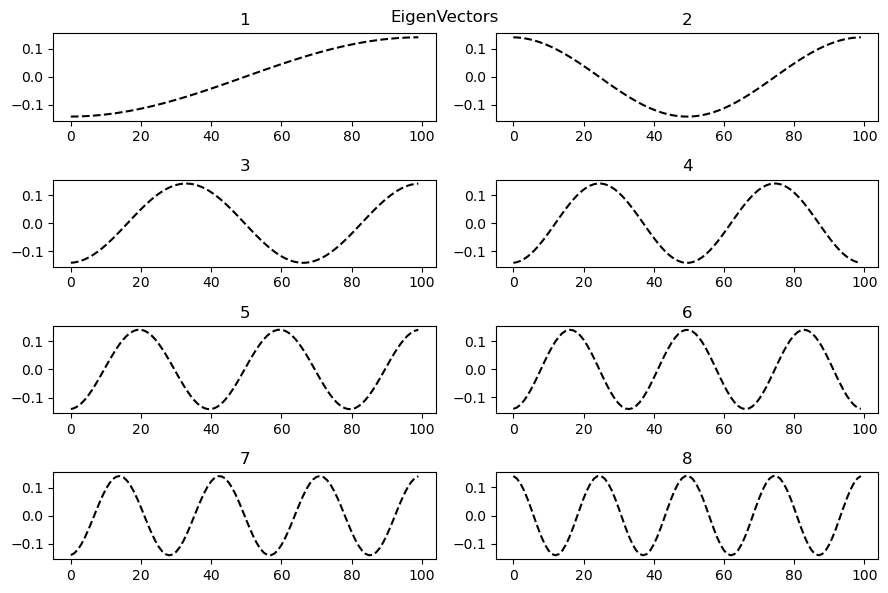

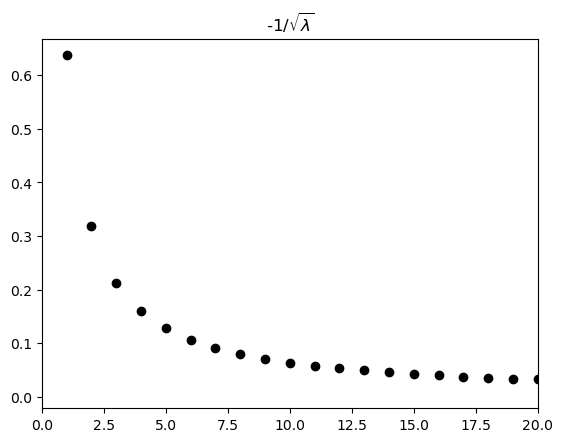

In [4]:
plt.figure(0,figsize=(9,6))
for i in range(0,8):
    plt.subplot(4,2,i+1)
    plt.plot(pa[:,i+1],'k--')
    plt.title(i+1)

plt.tight_layout()
plt.suptitle('EigenVectors')

plt.figure(1)
plt.plot(np.arange(1,len(qa),1),1/np.sqrt(-qa[1:]),'ko')
plt.xlim([0,20])
plt.title('-1/$\\sqrt{\\lambda}$')

2.5


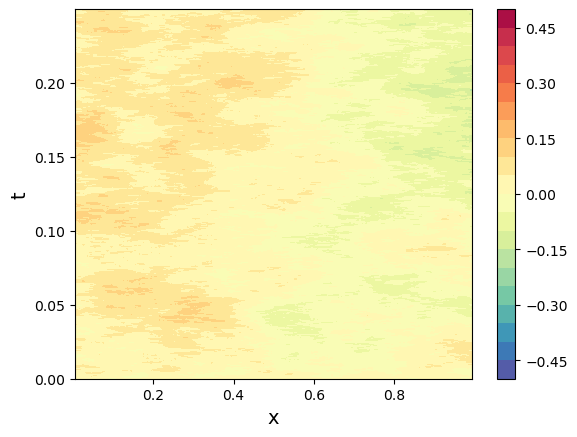

In [5]:
M=int(1e4)
t=np.arange(0,dt*M,dt)
print(M*dt/tau)


X=np.zeros([N,M])
for i in range(1,M):
    X[:,i] = X[:,i-1] + dt*np.dot(A,X[:,i-1]) + np.sqrt(dt)*B*np.random.randn(N)

plt.contourf(x,t,(X-X.mean(axis=0)).T,levels=np.linspace(-0.5,0.5,21),cmap=plt.cm.Spectral_r)
plt.xlabel('x',fontsize=14)
plt.ylabel('t',fontsize=14)
plt.colorbar()

In [6]:
Xa=X-X.mean(axis=0)[np.newaxis,:]
C = np.dot(Xa,Xa.T)
qc,pc= la.eig(C)
idx = qc.argsort()[::-1]   
qc = qc[idx]
pc = pc[:,idx]

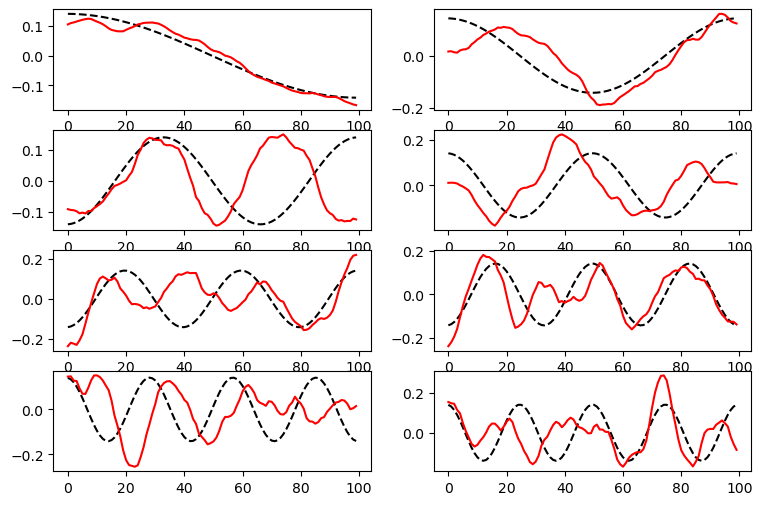

In [7]:
plt.figure(0,figsize=(9,6))
for i in range(0,8):
    plt.subplot(4,2,i+1)
    if np.sign(pa[0,i+1]) == np.sign(pc[0,i]) :
        plt.plot(pa[:,i+1],'k--')
    else:
        plt.plot(-pa[:,i+1],'k--')    
    plt.plot(pc[:,i],'r')


Text(0, 0.5, "$ \\frac{\\lambda_n}{\\lambda_{n+1}-\\lambda_{n}}\\;\\;\\frac{2}{N'}$")

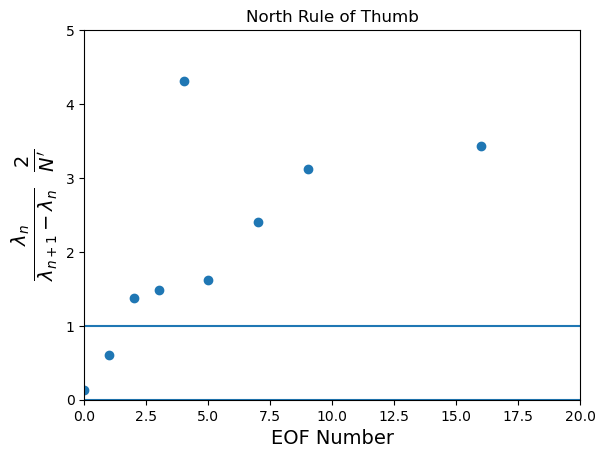

In [8]:

plt.plot(qc[1:]/(qc[:-1]-qc[1:])*2/(M*dt/tau),'o')
plt.axhline(0)
plt.axhline(1)
plt.xlim([0,20])
plt.ylim([0,5])
plt.title('North Rule of Thumb')
plt.xlabel('EOF Number',fontsize=14)
plt.ylabel('$ \\frac{\\lambda_n}{\\lambda_{n+1}-\\lambda_{n}}\\;\\;\\frac{2}{N\'}$',fontsize=20)